In [17]:
CMScaller

function (emat, templates = CMScaller::templates.CMS, rowNames = "entrez", 
    RNAseq = FALSE, nPerm = 1000, seed = NULL, FDR = 0.05, doPlot = TRUE, 
    verbose = TRUE) 
{
    if (class(emat)[1] == "ExpressionSet") {
        emat <- suppressPackageStartupMessages(Biobase::exprs(emat))
    }
    if (class(emat)[1] == "data.frame") 
        emat <- as.matrix(emat)
    if (is.vector(emat)) 
        emat <- matrix(emat, dimnames = list())
    if (is.null(rownames(emat))) 
        stop("missing Ensembl id rownames(emat)")
    if (ncol(emat) < 30) 
        warnings("few samples - high prediction variance", call. = FALSE)
    if (rowNames != "entrez") {
        if (!rowNames %in% c("symbol", "ensg")) 
            stop("invalid rowNames, must be either entrez, symbol or ensg")
        emat <- replaceGeneId(emat, id.in = rowNames, id.out = "entrez")
    }
    if (isTRUE(RNAseq)) {
        if (isTRUE(verbose)) 
            message("performing log2-transform and quantile normalization...")
        emat <- limma::normalizeQuantiles(log2(emat + 0.25))
    }
    is.na.rows <- is.na(fromTo(rownames(emat), rough = TRUE))
    mm <- sum(is.na.rows)/nrow(emat)
    if (mm > 0.15) {
        message(paste0(sum(is.na.rows), "/", nrow(emat), " rownames(emat) failed to match to human gene identifiers"))
        warning(paste0("verify that rownames(emat) are ", rowNames), 
            call. = FALSE)
    }
    emat <- ematAdjust(emat)
    res <- ntp(emat, templates, seed = seed, nPerm = nPerm, doPlot = doPlot, 
        verbose = verbose)
    res <- subSetNA(res, FDR = FDR, verbose = verbose)
    if (nPerm > 500) 
        if (min(res$FDR) > 0.1) 
            warning("low-confidence predictions - check input", 
                call. = FALSE)
    return(res)
}
<bytecode: 0x5637c2cac6f8>
<environment: namespace:CMScaller>

In [ ]:
utils::install.packages('devtools')
devtools::install_github('duct317/SCFA')
BiocManager::install("Biobase")

devtools::install_github("Lothelab/CMScaller")

In [2]:
BiocManager::install("org.Mm.eg.db")
BiocManager::install("biomaRt")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'org.Mm.eg.db'”
Old packages: 'BiasedUrn', 'BiocManager', 'bslib', 'coloc', 'DT', 'epiR',
  'evaluate', 'foghorn', 'fontawesome', 'ggplot2', 'gmp', 'incidence',
  'IRkernel', 'jsonlite', 'lintr', 'lubridate', 'MendelianRandomization',
  'parsedate', 'pbdZMQ', 'pingr', 'pkgload', 'plotly', 'prevalence', 'ragg',
  'shiny', 'vctrs', 'xfun', 'zip', 'mgcv', 'rpart'

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Warning message:
“package(s) not installed when vers

In [3]:
BiocManager::install("GeneStructureTools")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cloud.r-project.org


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.0 (2022-04-22)

Installing package(s) 'GeneStructureTools'

also installing the dependencies ‘DelayedArray’, ‘SummarizedExperiment’, ‘VariantAnnotation’, ‘BSgenome’, ‘GenomicFeatures’, ‘ensembldb’, ‘biovizBase’, ‘GenomicAlignments’, ‘BSgenome.Mmusculus.UCSC.mm10’, ‘Gviz’, ‘rtracklayer’


Warning message in install.packages(...):
“installation of package ‘DelayedArray’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘SummarizedExperiment’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘GenomicAlignments’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘rtracklayer’ had non-zero exit status”
Warning message in install.packages(...):
“inst

In [4]:
library(Biobase)
library(CMScaller)
library(limma)
library(dplyr)
library(tidyr)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


CMScaller v2.0.1; genome annotation: GENCODE v32/GRCh38.p13


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA



Attaching pack

In [5]:
sampleData <- read.table('data/tpm_per_sample.csv', sep=",",header = TRUE,row.names = 1,check.names=FALSE)


Warning message in file(file, "rt"):
“cannot open file 'data/tpm_per_sample.csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [6]:
head(sampleData)

,00ae9ab8-6eaa-4085-af72-26f96df97fa3,00cdff29-697a-4a17-ba67-cf55c006b827,01947597-c83a-4c5d-8a45-f1fe27992ad5,0194feb1-d8be-45e5-9b95-0596090e9ecc,019bfec7-ec6c-4cd6-808b-3e6e058e55f9,01d414a2-2b77-41e8-8622-98b277f5dc85,02033780-6bc1-407d-bd0f-45b6d74ae87b,0228ad1c-d5ac-4938-9157-4f7738edf233,025bf99d-1e89-43f3-b0b7-8dfe5d43e192,026818a6-8180-4d9c-9357-b88a832b374e,⋯,daba767c-5d22-4de1-81ba-8ad8f5626465,dabb0e59-8a93-4aa7-8ed2-b6bd22184740,dc0b07cb-49fb-44d0-b4d0-e99d50532d6d,dc483ad4-8346-4fd9-a2b9-5c5f463353ce,dcffa84a-e1e8-4003-a612-4ec5eee48b95,dd68d3db-7da4-432a-ae28-e151b12b3b1f,ddb546a8-f159-40d1-abb9-5e319a5a1aa0,dde6631e-ef66-4db4-a7cb-be94f4b9c4fd,de0f7996-1854-4b32-a2f9-1c99484b9e54,de5db4af-433b-4328-a9f9-35f601e1a74e
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000005.6,0.5909,4.2922,2.0690,1.9239,1.4758,0.0000,0.0594,4.1344,9.0339,2.6750,⋯,1.1432,3.7181,1.4520,1.0012,7.1257,0.0396,0.7823,0.2690,0.2039,2.0403
ENSG00000000419.13,189.5382,237.6030,190.5531,156.6911,16.1225,154.2567,83.0023,119.2740,205.8598,69.8698,⋯,322.5174,322.7273,99.8500,143.9555,134.3293,61.2061,145.5271,101.4817,51.9893,216.1977
ENSG00000000457.14,15.8945,6.3773,9.2412,5.0334,2.0466,14.1369,3.8364,18.2715,5.7232,5.5893,⋯,10.1738,8.4939,7.8363,13.1498,9.4945,10.7756,15.2237,5.2349,6.1107,5.9067
ENSG00000000460.17,14.0779,5.9787,5.0715,4.6298,2.9191,6.8826,3.8647,5.9286,4.5237,1.1532,⋯,7.0096,7.2415,2.2138,5.7137,10.1547,6.2779,14.7958,5.4037,5.2303,11.6023
ENSG00000000938.13,15.8794,7.0749,6.8626,3.0788,12.7103,1.5446,5.1619,3.5303,3.6424,4.0412,⋯,5.4383,9.0407,4.9218,11.5423,17.1217,0.0087,20.9967,11.6519,16.2852,57.1232
ENSG00000000971.16,20.6190,7.5633,17.4286,7.0697,3.2757,7.8847,9.4652,8.0993,3.8338,9.6292,⋯,5.9629,48.6030,25.2546,28.3012,69.4831,0.5683,61.3137,52.2428,42.9855,111.4801


In [7]:
a = rownames(sampleData)

In [10]:
ensmblID_stripped = sub("*\\.[0-9]", "", a)

In [13]:
rownames(sampleData) = ensmblID_stripped

36890/60659 rownames [NA.number] (no valid translation)

79/60659 rownames [id.number] (translation gives duplicates)

performing log2-transform and quantile normalization...

36969/60659 rownames(emat) failed to match to human gene identifiers

Warning message:
“verify that rownames(emat) are ensg”
cosine correlation distance

417/529 templates features not in emat, discarded

577 samples; 4 classes; 19-39 features/class

serial processing; 1000 permutation(s)...

predicted samples/class (FDR<0.05)




CMS1 CMS2 CMS3 CMS4 <NA> 
  76   98   73  122  208 


208/577 samples set to NA



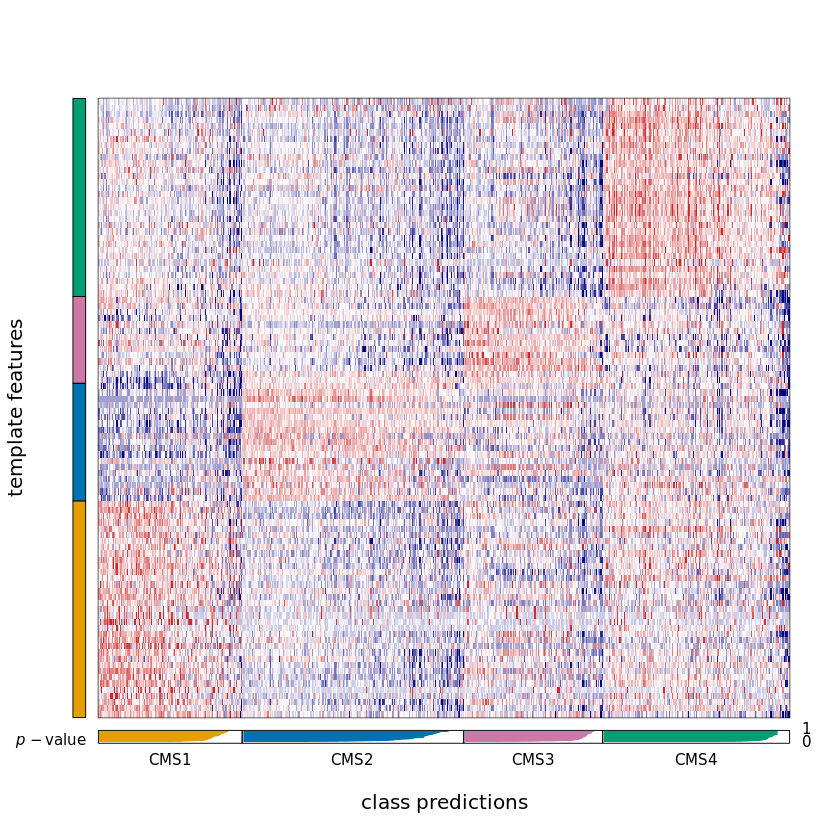

In [14]:
res <- CMScaller(sampleData, RNAseq=TRUE, doPlot=TRUE, rowNames = "ensg")

In [16]:
write.csv(res,"cmscaller_results.csv", row.names = TRUE)
